In [30]:
#importing the libraries

import numpy as np 
import pandas as pd 


In [31]:
# Q.1- Import the dataset from sklearn.datasets. Save the data and target values in X and y respectively.

#importing the MNIST dataset with pandas

df = pd.read_csv('mnist.csv')

X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [41]:
# Q.2- Use scikit-learn's cluster method to create clusters. Pass n_clusters as 10 to form ten clusters. Use fit_predict() function to fit and predict your data.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10)

y_kmeans=kmeans.fit_predict(X)

In [42]:
#Match each learned cluster label with the true labels found in them
from scipy.stats import mode
from sklearn import metrics

labels=np.zeros_like(y_kmeans)
for i in range(10):
    mask=(y_kmeans==i)
    labels[mask]=mode(y[mask])[0]

print(metrics.confusion_matrix(y,labels))

[[3027    2    4  188   24    0  853    2   32    0]
 [   0 4652    3    5    5    0    8    5    6    0]
 [  30  518 2892  193  135    0  232   49  128    0]
 [  17  308  125 2757  122    0  328   24  670    0]
 [   6  260   20    0 2265    0  246 1267    8    0]
 [  38  310    3 1326  243    0 1086  153  636    0]
 [  54  147   18   21   44    0 3844    3    6    0]
 [  12  409   31    5 1318    0   10 2603   13    0]
 [  23  400   25  722  115    0  184  113 2481    0]
 [  33  227    6   52 2127    0   32 1658   53    0]]


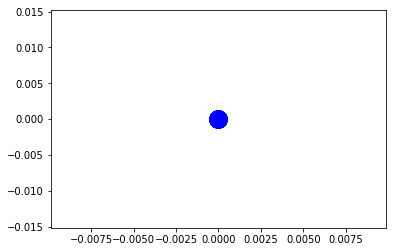

In [47]:
plt.scatter(X[y_kmeans == 0, 0], (X[y_kmeans == 0, 1]), c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], (X[y_kmeans == 1, 1]), c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], (X[y_kmeans == 2, 1]), c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], (X[y_kmeans == 3, 1]), c = 'violet', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], (X[y_kmeans == 4, 1]), c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'blue', label = 'centroid')
plt.show()

In [16]:
# Q.4- Print the accuracy score and confusion matrix

print(metrics.accuracy_score(y,labels))
print(metrics.confusion_matrix(y,labels))

0.583452380952381
[[2850    6    4  176   27  927  106    2   34    0]
 [   0 4656    3    5    3    3    4    4    6    0]
 [  26  522 2893  186  129  126  110   46  139    0]
 [  16  335  106 2755  121  351   27   24  616    0]
 [   5  283   23    0 2288   79  106 1279    9    0]
 [  35  380    4 1318  243 1066   48  150  551    0]
 [  58  269   33   22   46  782 2911    2   14    0]
 [  12  417   31    4 1315    6    5 2596   15    0]
 [  24  403   26  678  114  179   36  113 2490    0]
 [  30  238    7   51 2129   19   11 1651   52    0]]


IMAGE

In [2]:
# Q.1- Import any one image from the load_sample_image dataset from sklearn (ex. “china.jpg”). (optional)Print the image using imshow().

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
def showImage(image):
    plt.figure(figsize=(20,15))
    plt.imshow(image)
    
    

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


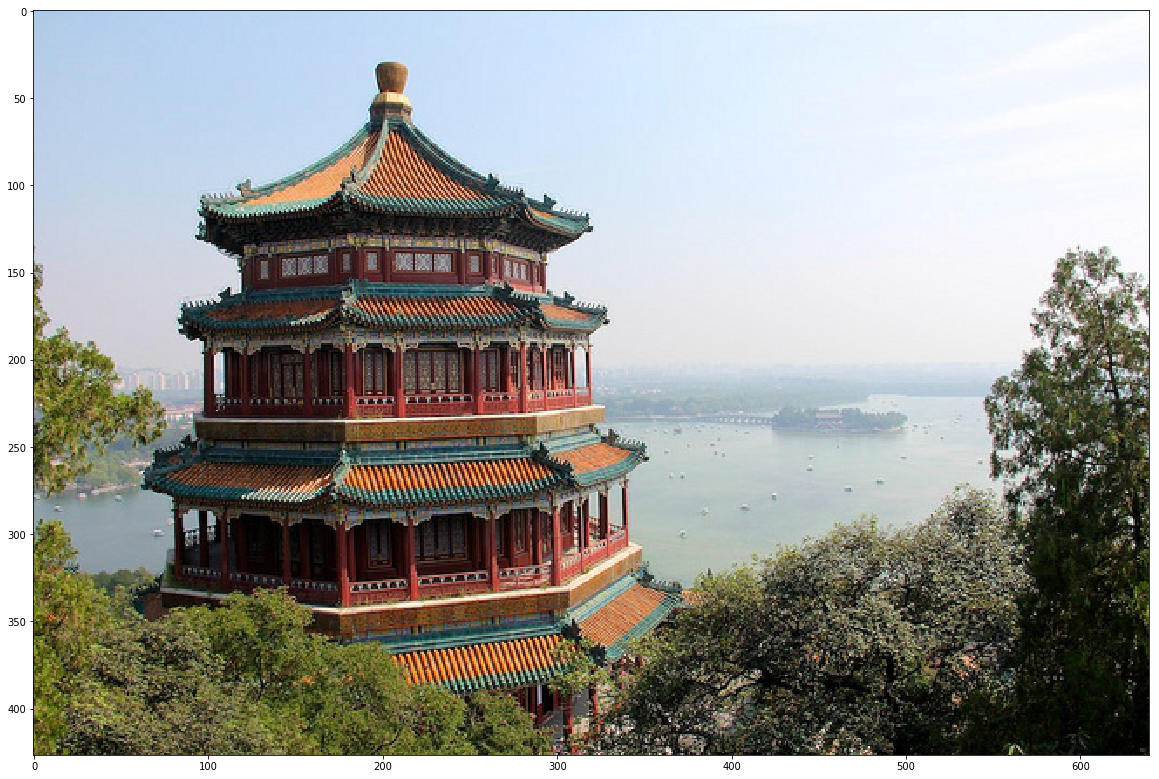

In [4]:
image = datasets.load_sample_image('china.jpg')
showImage(image)

In [7]:
# Shape of Image
# height,width and no of channels
x,y,z = image.shape

In [11]:
# Creating 2d image.
image2d = image.reshape(x*y,z)


In [13]:
image2d.shape

(273280, 3)

In [15]:
# Segmenting using k-means
kmean = KMeans(7)
kmean.fit(image2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
# Storing all centroids of the clusters formed 
centroids = kmean.cluster_centers_
type(centroids)

numpy.ndarray

In [17]:
# Storing all labels classified
lables = kmean.labels_
type(lables)

numpy.ndarray

In [18]:
# Creating a new image from the centroids and the label
seg_image = centroids[lables].reshape(image.shape)
seg_image.shape

(427, 640, 3)

In [20]:
seg_image.dtype

dtype('float64')

In [21]:
image.dtype

dtype('uint8')

In [22]:
# We can see that the dtype has changed so we need to convert it back to uint8
seg_image = seg_image.astype(np.uint8)

In [23]:
seg_image.dtype

dtype('uint8')

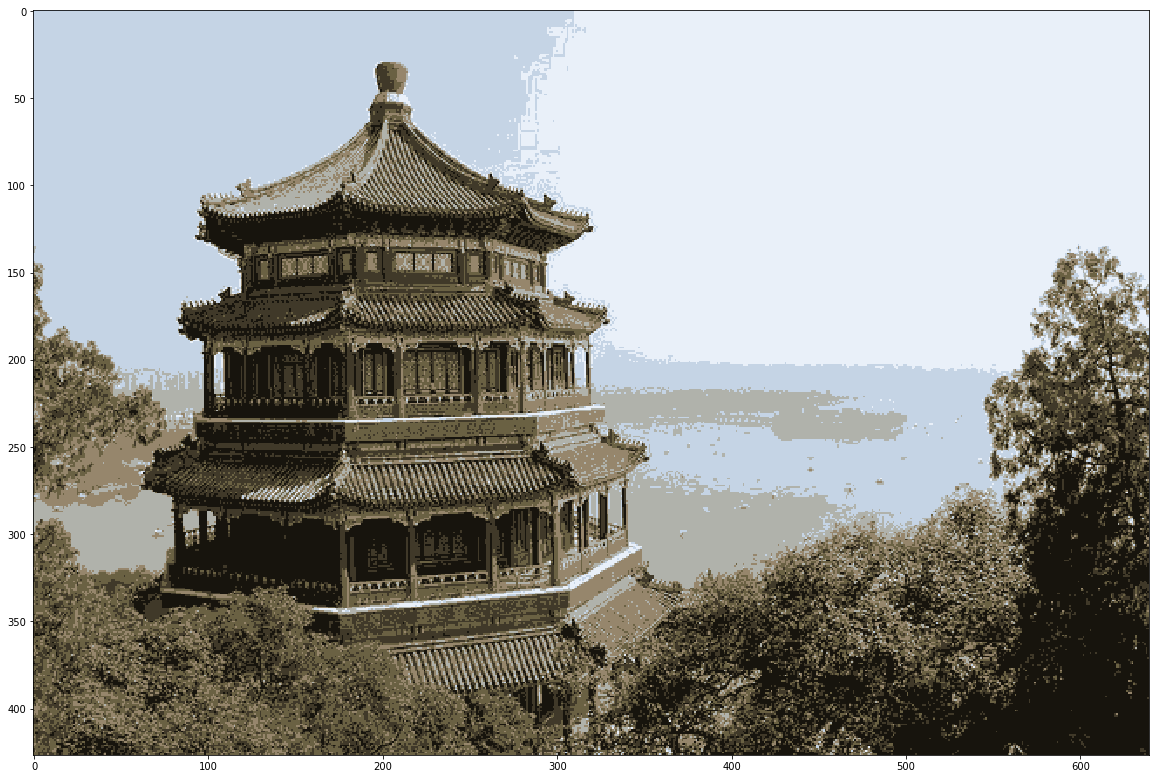

In [24]:
# Show Segmented image
showImage(seg_image)